## Import Libraries

In [43]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
warnings.filterwarnings("ignore")

# Load dataset 

In [44]:
df = pd.read_csv("bank.csv")

# EDA

In [45]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


In [46]:
cols_to_drop=["contact", "day", "month", "duration","previous"]
df.drop(cols_to_drop, axis=1 , inplace=True)

In [47]:
## Cheking datatype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   balance    11162 non-null  int64 
 5   housing    11162 non-null  object
 6   loan       11162 non-null  object
 7   campaign   11162 non-null  int64 
 8   pdays      11162 non-null  int64 
 9   deposit    11162 non-null  object
dtypes: int64(4), object(6)
memory usage: 872.2+ KB


In [48]:
df.shape

(11162, 10)

In [49]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
loan         object
campaign      int64
pdays         int64
deposit      object
dtype: object

In [50]:
dtypes = df.dtypes
nunique = df.nunique()
data_types_nunique = pd.DataFrame({"Dtypes": dtypes , "Nunique":nunique})
data_types_nunique

,Dtypes,Nunique
age,int64,76
job,object,12
marital,object,3
education,object,4
balance,int64,3805
housing,object,2
loan,object,2
campaign,int64,36
pdays,int64,472
deposit,object,2


In [51]:
category_cols= ["job", "marital", "education", "housing", "loan","deposit"]
df[category_cols] = df[category_cols].astype("category")

In [52]:
pd.DataFrame(df.dtypes).T

,age,job,marital,education,balance,housing,loan,campaign,pdays,deposit
0,int64,category,category,category,int64,category,category,int64,int64,category


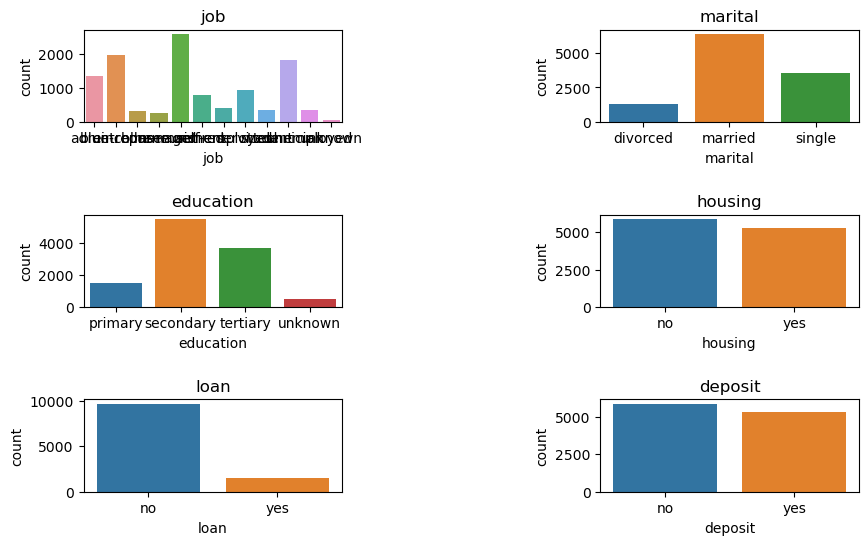

In [53]:
plt.figure(figsize=(10,6))
for i, col in enumerate(category_cols):
    plt.subplot(3,2,i+1)
    sns.countplot(x=col, data=df )
    plt.xlabel(col)
    plt.title(f"{col}")
plt.subplots_adjust(wspace = 1 , hspace= 1)    
plt.show()

###  Null Values

In [54]:
data_info = pd.DataFrame(df.count())
data_info["Missing"]  = df.isna().sum()
data_info["N_unique"] = df.nunique()
data_info["Dtypes"]   = df.dtypes
data_info.rename(columns={0 : "Count"} , inplace=True)
data_info

,Count,Missing,N_unique,Dtypes
age,11162,0,76,int64
job,11162,0,12,category
marital,11162,0,3,category
education,11162,0,4,category
balance,11162,0,3805,int64
housing,11162,0,2,category
loan,11162,0,2,category
campaign,11162,0,36,int64
pdays,11162,0,472,int64
deposit,11162,0,2,category


In [55]:
##Calculate the ratio for null values in each column.
null = df.isnull().sum()
df.shape[0]
ratio = null / df.shape[0]
pd.DataFrame({"null": null, "ration": ratio})

,null,ration
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
balance,0,0.0
housing,0,0.0
loan,0,0.0
campaign,0,0.0
pdays,0,0.0
deposit,0,0.0


## Handle Outliers

In [56]:
num_cols= ["age", "balance", "pdays", "campaign"]


<Axes: xlabel='age', ylabel='Count'>

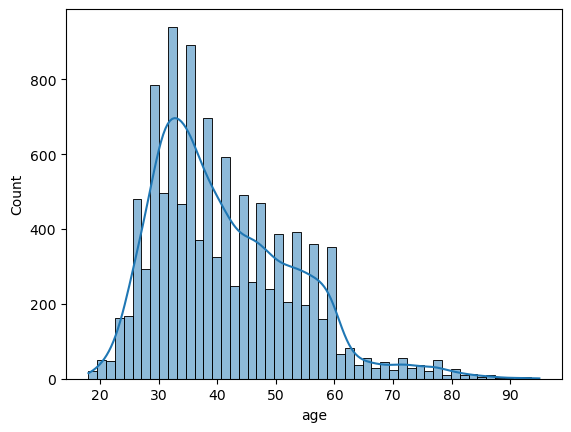

In [57]:
sns.histplot(data = df, x = "age", kde = True)

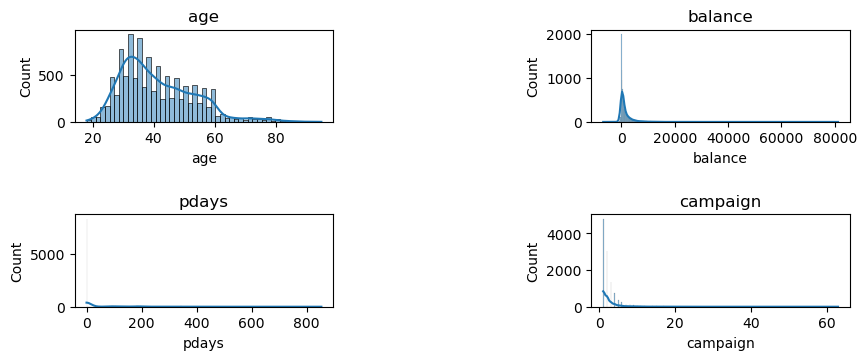

In [58]:
plt.figure(figsize=(10,6))
for i, col in enumerate(num_cols):
    plt.subplot(3,2,i+1)
    sns.histplot(df[col], kde= True)
    plt.title(col)
plt.subplots_adjust(wspace = 1 , hspace= 1)    
plt.show()


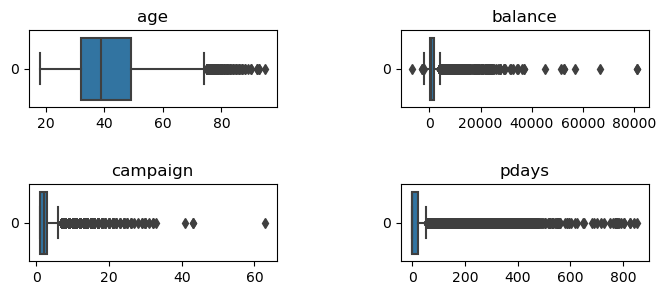

In [59]:
num_cols= df.select_dtypes("number").columns
plt.figure(figsize=(8,3))
for i, col in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(col)
    
plt.subplots_adjust(wspace = 0.5 , hspace= 1)    
plt.show()

 **Remove outliers**

In [60]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)


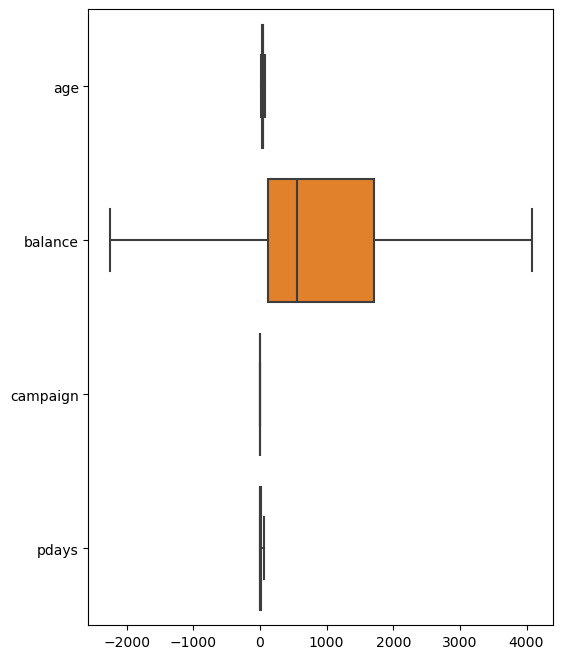

In [61]:
plt.figure(figsize=(6,8))
sns.boxplot(data= df , orient= "h")
plt.show()

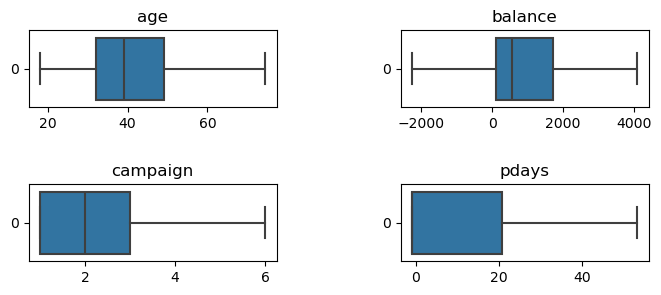

In [62]:
num_cols= df.select_dtypes("number").columns
plt.figure(figsize=(8,3))
for i, col in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(col)
    
plt.subplots_adjust(wspace = 0.5 , hspace= 1)    
plt.show()

## Visualization

**Relationship between the numerical columns & the target**

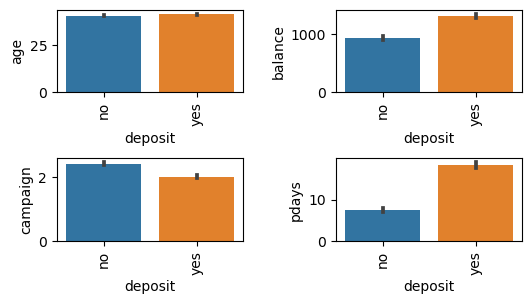

In [63]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(6, 3))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.barplot(x="deposit", y=col, data=df)
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.8, wspace=.5)
plt.show()

**Relationship between the categorical columns & the target**

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
deposit,,,,,,,,,,,,
no,703,1236,205,165,1265,262,218,554,91,983,155,36
yes,631,708,123,109,1301,516,187,369,269,840,202,34


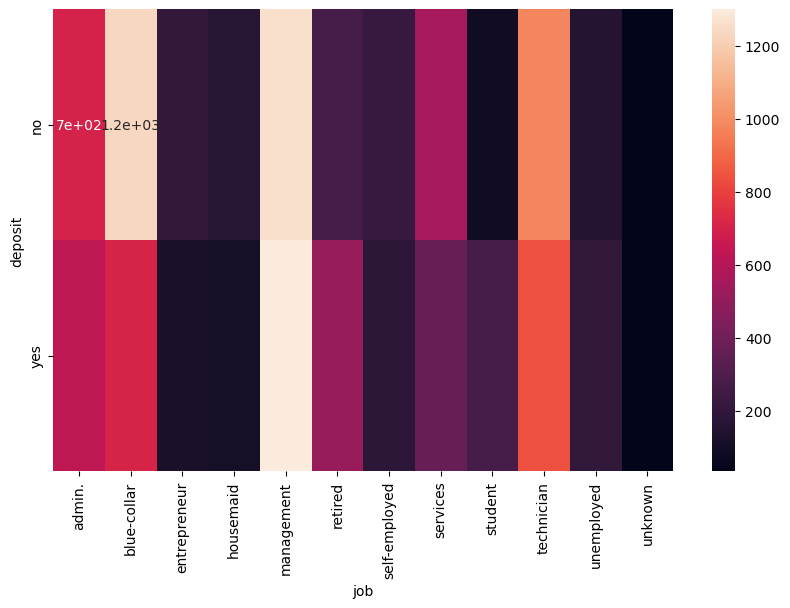

marital,divorced,married,single
deposit,,,
no,671,3596,1606
yes,622,2755,1912


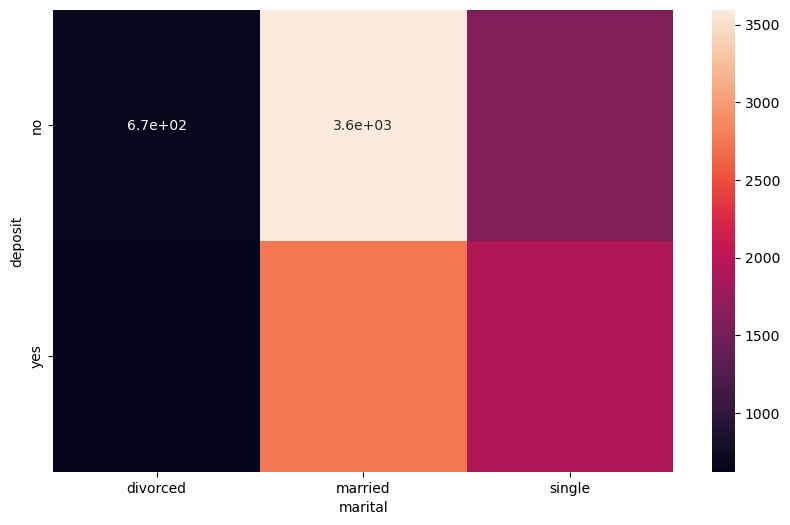

education,primary,secondary,tertiary,unknown
deposit,,,,
no,909,3026,1693,245
yes,591,2450,1996,252


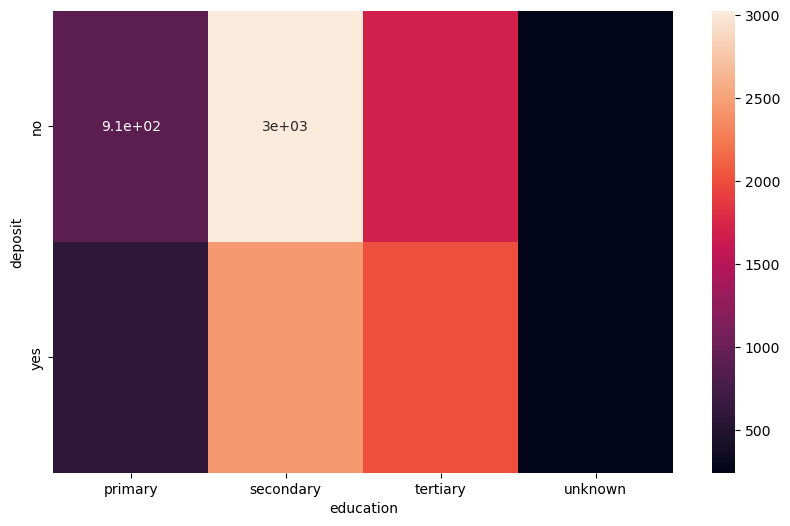

housing,no,yes
deposit,,
no,2527,3346
yes,3354,1935


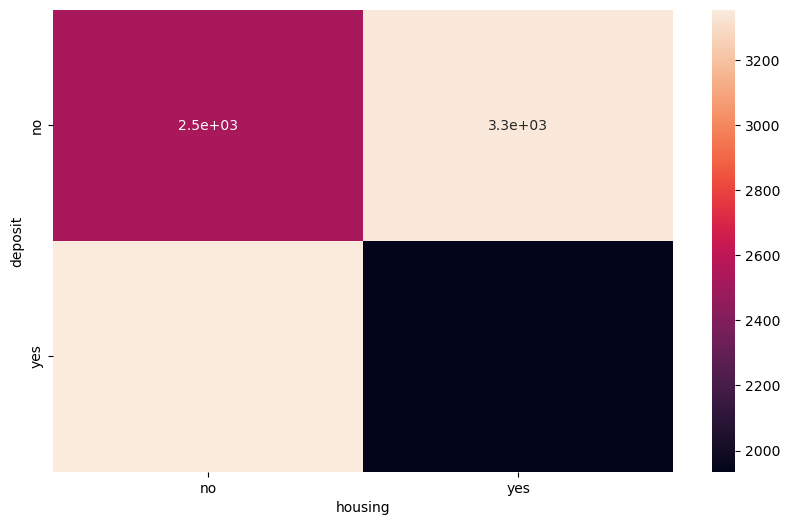

loan,no,yes
deposit,,
no,4897,976
yes,4805,484


<Axes: xlabel='loan', ylabel='deposit'>

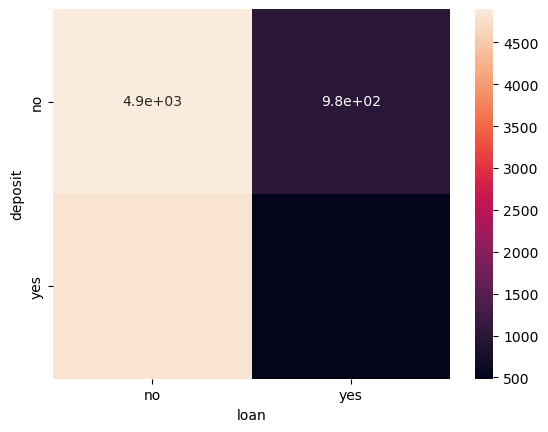

In [64]:
for col in category_cols[:-2]:
    agg = df.pivot_table(index = "deposit", columns=col, aggfunc=len, values="loan")
    plt.figure(figsize=(10, 6))
    display(agg)
    sns.heatmap(agg, annot=True)
    plt.show()
    print("="*50)

agg = df.pivot_table(index = "deposit", columns="loan", aggfunc=len, values="marital")
display(agg)
sns.heatmap(agg, annot=True)

 # Check for duplicates

In [65]:
df.duplicated().sum()

194

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.duplicated().sum()

0

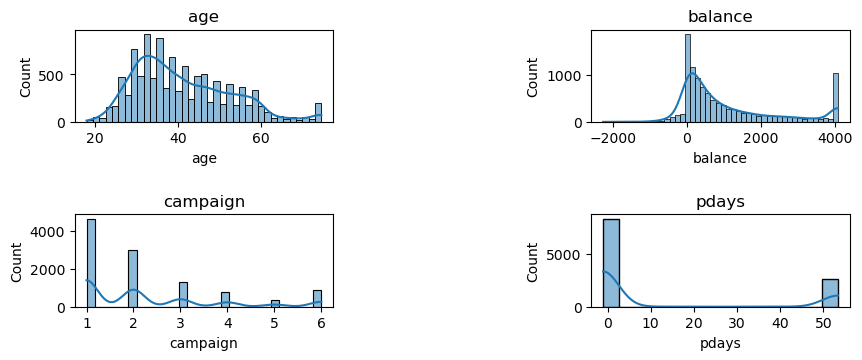

In [68]:
plt.figure(figsize=(10,6))
for i, col in enumerate(num_cols):
    plt.subplot(3,2,i+1)
    sns.histplot(df[col], kde= True)
    plt.title(col)
plt.subplots_adjust(wspace = 1 , hspace= 1)    
plt.show()

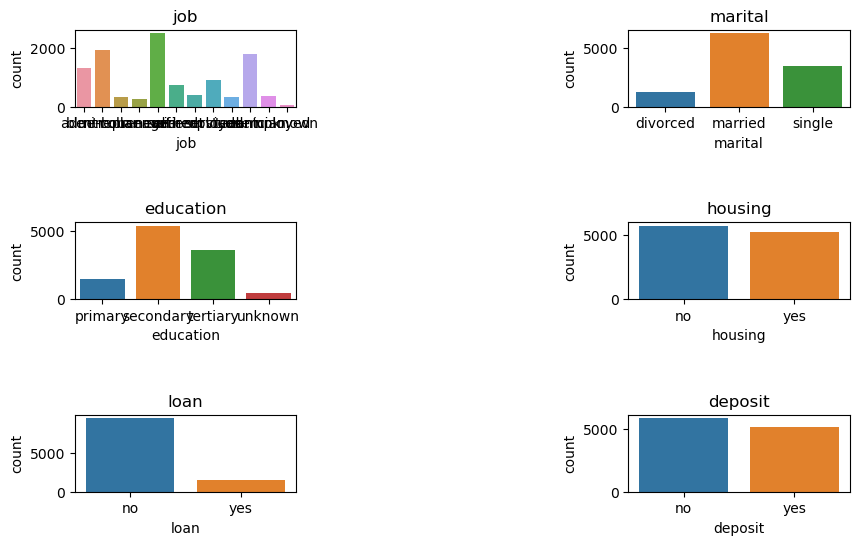

In [69]:
plt.figure(figsize=(10,6))
for i, col in enumerate(category_cols):
    plt.subplot(3,2,i+1)
    sns.countplot(x=col, data=df )
    plt.xlabel(col)
    plt.title(f"{col}")
plt.subplots_adjust(wspace = 1.5 , hspace= 1.5)    
plt.show()

### Data Splitting

In [70]:
X = df.drop("deposit", axis=1)
y = df[["deposit"]]

## Normalization

In [71]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

## Encoding 

In [72]:
string_cols = ['job', 'marital', 'education', 'housing', 'loan']
pd.DataFrame(df[string_cols].nunique()).T

,job,marital,education,housing,loan
0,12,3,4,2,2


In [73]:
ordinal_cols = ['education', 'housing', 'loan']
binary_cols = ['job']
one_hot_cols = ['marital']

In [74]:
### Ordinal Encoding
labels = {
          'education': {'unknown': 0, 'primary': 1, 'tertiary': 2, 'secondary':3},
          'housing': {'no': 0, 'yes': 1},
          'loan': {'no': 0, 'yes': 1}
         }


In [75]:
for col in ordinal_cols:
    X[col] = X[col].map(labels[col])

In [76]:
### Binary Encoding
!pip install category_encoders
from category_encoders import BinaryEncoder
binary_encoder = BinaryEncoder(cols=binary_cols)
X = binary_encoder.fit_transform(X)

In [77]:
type(X)

pandas.core.frame.DataFrame

In [78]:
## One hot Encoding
one_hot_cols = ['marital']
from category_encoders import OneHotEncoder
one_hot_encoder = OneHotEncoder(cols=one_hot_cols)
X = one_hot_encoder.fit_transform(X)

In [79]:
## Lable Encoding 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y["deposit"] = label_encoder.fit_transform(y["deposit"])